# Lead Scoring Case Study
## Finding most probable from all leads to most convertable leads

#### Problem Statement:

X Education sells online courses to industry professionals. X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
 
<b>Business Objective:</b><br>
-- X education wants to know most promising leads.<br> 
-- Make a model which tells that which leads are most promising. 

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

## Reading and Understanding the Data

In [3]:
leads = pd.read_csv("Leads.csv")
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [4]:
# Lets see the shape of the dataset and data type of the variables
# Also see missing values if any exist in the dataset.
print(leads.shape)
leads.info()

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

So, there are lots of missing values.<br>
and almost all the varibles are of object types.<br>
We need to see all of them seperately.

In [5]:
# check for the missing values.
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# Basic statistics of the variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# check for duplicates
print(leads.duplicated().sum())

0


In [8]:
# Check for duplicates/value count
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Remove the features which has no variance 
leads = leads.drop([ "Magazine","Receive More Updates About Our Courses",
              "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)
leads.shape

(9240, 32)

In [10]:
# Remove the "Prospect ID", "Lead Number" which is not necessary for the analysis
leads = leads.drop(['Prospect ID','Lead Number'],axis=1)

leads.shape

(9240, 30)

In [11]:
# check for the value counts for some of the object type variables.
# Which are categorial variables

columns = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity']

for col in columns:
    print(col+':')
    print(leads[col].value_counts())
    print(100*'-')

Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------------------
Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
youtubechannel          1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------------------
Do

In [12]:
# Remove the features which has no enough variance 

leads = leads.drop([ "Do Not Call","What matters most to you in choosing a course","Search","Newspaper Article",
                   "X Education Forums","Newspaper","Digital Advertisement"],axis=1)

leads.shape

(9240, 23)

In [13]:
# look at data having "Through Recommendations" feature, although it has very less data for 
leads[leads["Through Recommendations"]=='Yes'].Converted.value_counts()

1    5
0    2
Name: Converted, dtype: int64

In [14]:
# So lets calculate the convertion rate for the leads which are through recommendations
print("Conversion rate for the Recommended leads = {0}".format(round(5/7*100,2)))

Conversion rate for the Recommended leads = 71.43


### Quite high convertion rate of 71.43% when canditates have got recomendations

In [15]:
# because there is very less variance in the "Through Recommendations" column, we will delete this as well.
leads = leads.drop('Through Recommendations',axis=1)
leads.shape

(9240, 22)




These columns has <font color = blue>"select"</font> as the value:<br>
> Specialization<br>
> City<br>
> Lead Profile<br>
> How did you hear about X Education<br>

They are actually the null value, lets impute the null value in place of select

In [16]:
# mark select values as missing or NaN
leads = leads.replace('Select', np.NaN)
print(leads.shape)
leads.isnull().sum()

(9240, 22)


Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Tags                                      3353
Lead Quality                              4767
Lead Profile                              6855
City                                      3669
Asymmetrique Activity Index               4218
Asymmetrique Profile Index                4218
Asymmetrique Activity Score               4218
Asymmetrique Profile Score                4218
A free copy of Mastering The Interview       0
Last Notable 

In [17]:
cities = ['Mumbai', 'Thane & Outskirts', 'Other Cities of Maharashtra']
leads.loc[((leads.Country.isnull()) & (leads.City.isin(cities))), ['Country']] = 'India'
leads.Country.isnull().sum()

2127

In [18]:
# dropping the columns having more than 70% as missing value
leads = leads.drop(['How did you hear about X Education','Lead Profile'],axis=1)
leads.shape

(9240, 20)

In [19]:
# lets see row wise the missing data
len(leads[leads.isnull().sum(axis=1)>=5])

3777

No of convertion in missing Lead Quality:
1024
Fraction of conversion in missing Lead Quality :0.22
----------------------------------------------------------------------------------------------------
Bar plot for non missing value:


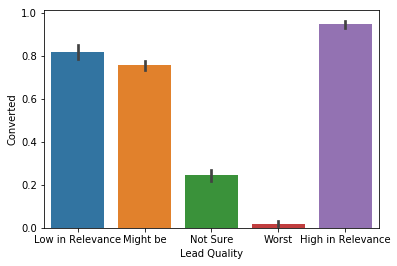

In [20]:
#Lead Quality
print("No of convertion in missing Lead Quality:")
print(leads[leads['Lead Quality'].isnull()].Converted.sum())

n = len(leads[leads['Lead Quality'].isnull()].index)
print("Fraction of conversion in missing Lead Quality :{0}".format(round(1064/n,2)))

print(100*'-')     
print("Bar plot for non missing value:")
sns.barplot(y='Converted',x='Lead Quality',data=leads)

In [21]:
# Imputing the values in missing value, with "Unknown"
leads['Lead Quality'] = leads['Lead Quality'].fillna('Unknown')

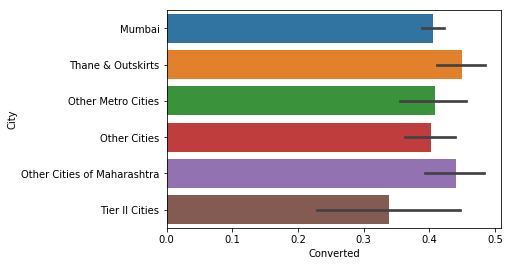

In [22]:
#City
sns.barplot(x='Converted',y='City',data=leads)

In [23]:
# lets check the fractional value in the conversion in missing value
nC = leads[leads['City'].isnull()].Converted.sum()

nT = len(leads[leads['City'].isnull()].index)
print("Fraction of conversion in missing City :{0}".format(round(nC/nT,2)))

Fraction of conversion in missing City :0.34


In [24]:
# dropping the columns having more than 30% as missing value
leads = leads.drop(['City'],axis=1)

In [25]:
leads['Country'] = leads['Country'].fillna('Unknown')
leads.loc[((~(leads.Country == 'India')) & (~(leads.Country == 'Unknown'))), 'Country'] = 'Abroad'

In [26]:
pd.crosstab(leads['Country'], leads['Converted'])

Converted,0,1
Country,,
Abroad,203,84
India,4168,2658
Unknown,1308,819


In [27]:
# There is no significant variability with respect to the column country found.
# So droping this column
leads = leads.drop('Country',axis=1)
print(leads.shape)

(9240, 18)


In [28]:
# lets see the missing values again
round(leads.isnull().sum()/len(leads.index)*100,2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                               0.00
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                45.65
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


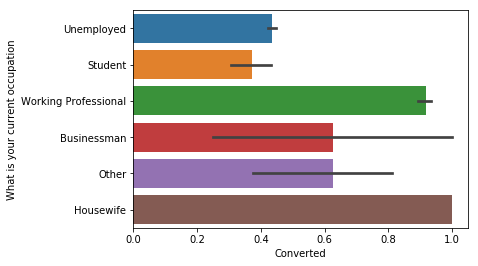

In [29]:
#What is your current occupation
print(leads['What is your current occupation'].value_counts())
plt.figure(figsize=(6,4))
sns.barplot(x='Converted',y='What is your current occupation',data=leads)

In [30]:
# lets check the fractional value in the "What is your current occupation" in missing value
nC = leads[leads['What is your current occupation'].isnull()].Converted.sum()

nT = len(leads[leads['What is your current occupation'].isnull()].index)
print("Fraction of conversion in missing What is your current occupation :{0}".format(round(nC/nT,2)))

Fraction of conversion in missing What is your current occupation :0.14


This column "What is your current occupation" has mouth watering variances. But difficult to impute also as it fraction of conversion is not matching with any of the items in the column. So It is better to have some different value defined for this missing value.

Lets replace the missing value with **"Unknown"** value. 

In [31]:
# inputing the missing value in the column "What is your current occupation" by "Unknown".

leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unknown')
leads['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

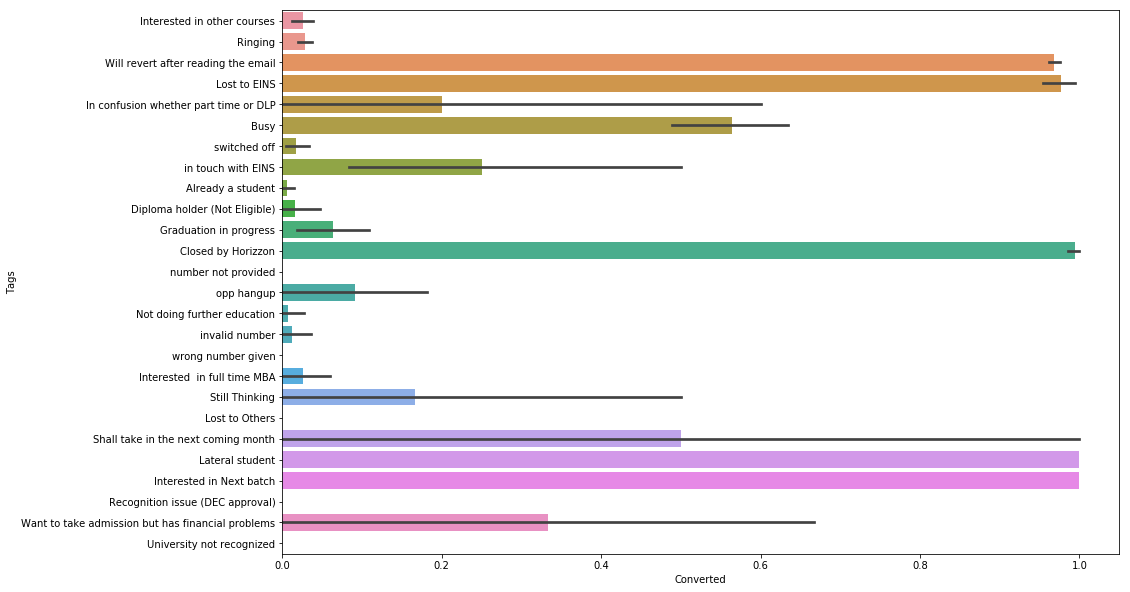

In [32]:
#Tags
print(leads['Tags'].value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x='Converted',y='Tags',data=leads)

In [33]:
# lets check the fractional value in the "Tags" in missing value
nC = leads[leads['Tags'].isnull()].Converted.sum()

nT = len(leads[leads['Tags'].isnull()].index)
print("Fraction of conversion in missing Tags :{0}".format(round(nC/nT,2)))

Fraction of conversion in missing Tags :0.25


In [34]:
# This Tags column must be absorbed in the Leads Quality column and hence this should be dropped
leads = leads.drop('Tags',axis=1)
print(leads.shape)

(9240, 17)


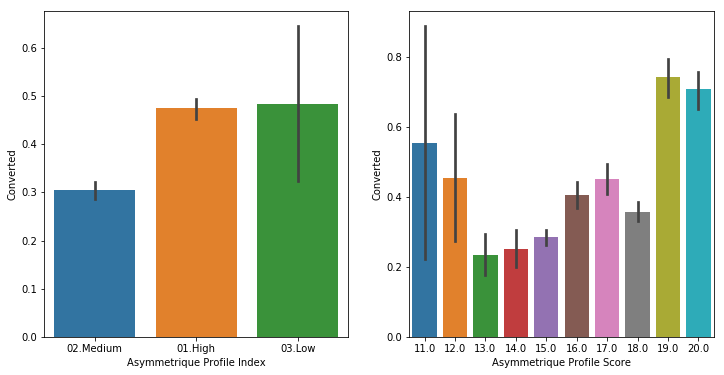

In [35]:
# 'Asymmetrique Profile Index' and "Asymmetrique Profile Score"
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.barplot(y='Converted',x='Asymmetrique Profile Index',data=leads)

plt.subplot(122)
sns.barplot(y='Converted',x='Asymmetrique Profile Score',data=leads)

Above Plot summary:
> The relation between "Asymmetrique Profile Index" and "converted" is not properly described as low having higher 
conversion rate than the medium.
>The relation between "Asymmetrique Profile Score" and "converted" is properly described relationship.

Hence, we should drop these coloumns.

In [36]:
leads = leads.drop(["Asymmetrique Profile Index","Asymmetrique Profile Score"],axis=1)
print(leads.shape)

(9240, 15)


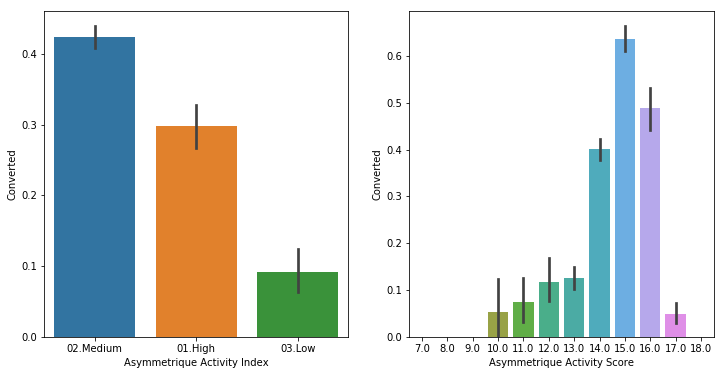

In [37]:
# 'Asymmetrique Activity Index' and "Asymmetrique Activity Score"
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.barplot(y='Converted',x='Asymmetrique Activity Index',data=leads)

plt.subplot(122)
sns.barplot(y='Converted',x='Asymmetrique Activity Score',data=leads)

In [38]:
# Similarily, we should drop the following columns with same reason
leads = leads.drop(["Asymmetrique Activity Index","Asymmetrique Activity Score"],axis=1)

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64


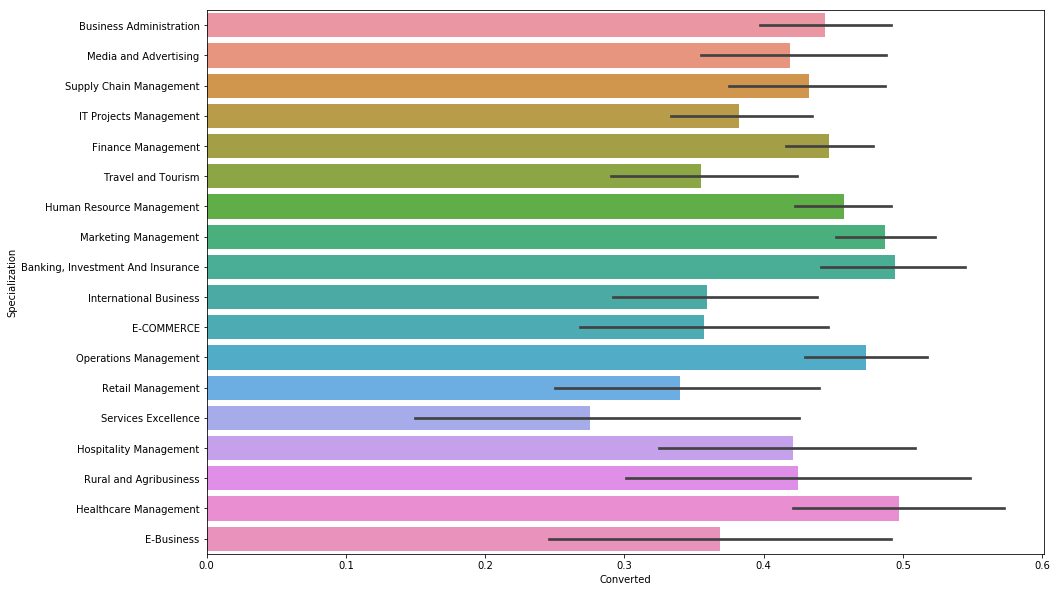

In [39]:
#What is specialization
print(leads['Specialization'].value_counts())
plt.figure(figsize=(15,10))
sns.barplot(x='Converted',y='Specialization',data=leads)

In [40]:
leads[leads['Last Activity'].isnull()]['Last Notable Activity'].value_counts()

Modified    103
Name: Last Notable Activity, dtype: int64

In [41]:
pd.crosstab(leads['Last Activity'], leads.Converted)

Converted,0,1
Last Activity,,
Approached upfront,0,9
Converted to Lead,374,54
Email Bounced,300,26
Email Link Clicked,194,73
Email Marked Spam,0,2
Email Opened,2184,1253
Email Received,0,2
Form Submitted on Website,88,28
Had a Phone Conversation,8,22


In [42]:
pd.crosstab(leads['Last Notable Activity'], leads.Converted)

Converted,0,1
Last Notable Activity,,
Approached upfront,0,1
Email Bounced,51,9
Email Link Clicked,128,45
Email Marked Spam,0,2
Email Opened,1783,1044
Email Received,0,1
Form Submitted on Website,1,0
Had a Phone Conversation,1,13
Modified,2624,783


In [43]:
# Percentage of converted in null values of Last Activity is 4 times of not converted so imputing the values
leads['Last Activity'] = leads['Last Activity'].fillna('SMS Sent')

In [44]:
# Similarily, we should drop the following columns with same reason
leads = leads.drop(["Specialization", 'Last Notable Activity', 'Lead Quality'],axis=1)

In [45]:
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [46]:
pd.crosstab(leads.Converted, leads['A free copy of Mastering The Interview'], normalize=True)

A free copy of Mastering The Interview,No,Yes
Converted,,
0,0.413528,0.201082
1,0.273918,0.111472


In [47]:
leads = leads.rename(columns={"Total Time Spent on Website": "Total Time Spent", "What is your current occupation": "current occupation", "A free copy of Mastering The Interview": "Mastering The Interview"})

#### Outlier treatment

In [48]:
leads.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,Converted,TotalVisits,Total Time Spent,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
80%,1.000000,5.000000,1087.200000,4.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [49]:
leads[~(leads['TotalVisits'] > 50)]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,current occupation,Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,No
5,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Unknown,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Unemployed,No
7,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Unknown,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,Unknown,Yes
9,API,Google,No,0,4.0,58,4.00,Email Opened,Unknown,No


In [50]:
leads[~(leads['Page Views Per Visit'] > 20)]

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,current occupation,Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,No
5,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Unknown,No
6,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Unemployed,No
7,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,Unknown,No
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,Unknown,Yes
9,API,Google,No,0,4.0,58,4.00,Email Opened,Unknown,No


In [51]:
leads = leads[~(leads['Page Views Per Visit'] > 20)]
leads = leads[~(leads['TotalVisits'] > 50)]

In [52]:
# Lets see the shape of the dataframe
print(leads.shape)
# lets see the missing values
round(leads.isnull().sum()/len(leads.index)*100,2)

(9233, 10)


Lead Origin                0.00
Lead Source                0.39
Do Not Email               0.00
Converted                  0.00
TotalVisits                1.48
Total Time Spent           0.00
Page Views Per Visit       1.48
Last Activity              0.00
current occupation         0.00
Mastering The Interview    0.00
dtype: float64

#### Imputing null values

In [53]:
leads.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

,Converted,TotalVisits,Total Time Spent,Page Views Per Visit
count,9233.000000,9096.000000,9233.000000,9096.000000
mean,0.385465,3.369393,487.493556,2.352300
std,0.486731,3.496874,547.970375,2.074066
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
80%,1.000000,5.000000,1087.000000,4.000000
90%,1.000000,7.000000,1379.800000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [54]:
leads[leads['Page Views Per Visit'].isnull()].Converted.value_counts()

1    100
0     37
Name: Converted, dtype: int64

In [55]:
leads[leads.TotalVisits.isnull()]['Lead Source'].value_counts()

Reference           91
Facebook            24
Welingak Website    13
Olark Chat           2
Name: Lead Source, dtype: int64

In [56]:
leads[leads['Lead Source'] == 'Reference']['Page Views Per Visit'].median()

0.0

In [57]:
# Observed that major part of null values in "Page Views Per Visit", "TotalVisits" are Converted. 
# So, imputing median values of them to null values
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(0)
leads.TotalVisits = leads.TotalVisits.fillna(0)

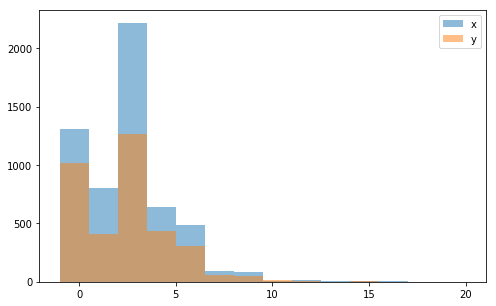

In [58]:
bins = np.linspace(-1, 20, 15)
plt.subplots(figsize=(8,5))
plt.hist(leads['Page Views Per Visit'][leads.Converted == 0], bins, alpha=0.5, label='x')
plt.hist(leads['Page Views Per Visit'][leads.Converted == 1], bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

In [59]:
leads[leads['Lead Source'].isnull()]['Lead Origin'].value_counts()

Lead Add Form              33
Landing Page Submission     1
Lead Import                 1
Quick Add Form              1
Name: Lead Origin, dtype: int64

In [60]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4880
API                        3579
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [61]:
leads[leads['Lead Origin'] == 'Lead Add Form']['Lead Source'].value_counts()

Reference           534
Welingak Website    142
Click2call            4
Olark Chat            2
Live Chat             2
Google                1
Name: Lead Source, dtype: int64

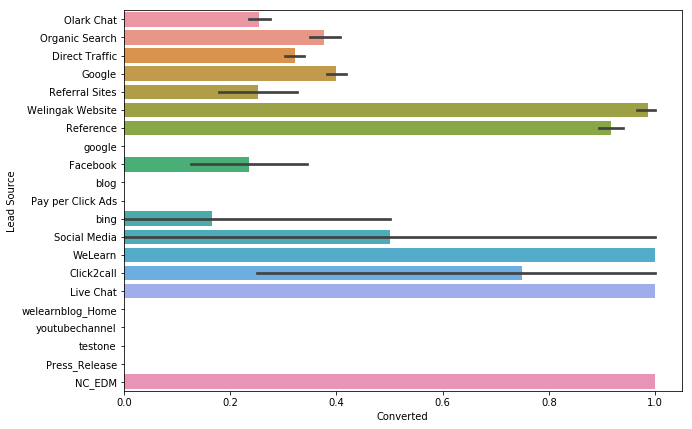

In [62]:
plt.figure(figsize=(10,7))
sns.barplot(x='Converted',y='Lead Source',data=leads)

In [63]:
# impute lead source as "Reference" because its the mode of distribution
leads['Lead Source'] = leads['Lead Source'].fillna('Reference')

In [64]:
leads.dtypes

Lead Origin                 object
Lead Source                 object
Do Not Email                object
Converted                    int64
TotalVisits                float64
Total Time Spent             int64
Page Views Per Visit       float64
Last Activity               object
current occupation          object
Mastering The Interview     object
dtype: object

In [65]:
# Lets see the shape of the dataframe
print(leads.shape)
# lets see the missing values
round(leads.isnull().sum()/len(leads.index)*100,2)

(9233, 10)


Lead Origin                0.0
Lead Source                0.0
Do Not Email               0.0
Converted                  0.0
TotalVisits                0.0
Total Time Spent           0.0
Page Views Per Visit       0.0
Last Activity              0.0
current occupation         0.0
Mastering The Interview    0.0
dtype: float64

In [66]:
# Get the number of retained rows using 'len()'
# Get the percentage of retained rows by dividing the current number of rows with initial number of rows
print(len(leads.index))
print(len(leads.index)/9240)

9233
0.9992424242424243


## Data Preparation
You can see that your dataset has many columns with categorical values. But in order to fit a regression line, we would need numerical values and not string. 

In [67]:
# Creating data from Catagorical variables to Numeric variables
leads=leads.replace({'Do Not Email':{'No':0,'Yes':1}})
leads['Mastering The Interview'] = leads['Mastering The Interview'].map({'No' : 0, 'Yes': 1})
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,current occupation,Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,Unemployed,0
5,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Unknown,0
6,Landing Page Submission,Google,0,1,2.0,1640,2.00,Email Opened,Unemployed,0
7,API,Olark Chat,0,0,0.0,0,0.00,Olark Chat Conversation,Unknown,0
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.00,Email Opened,Unknown,1
9,API,Google,0,0,4.0,58,4.00,Email Opened,Unknown,0


### Dummy Variables

In [68]:
# Multilevel variable converting to dummy
multivar = ['Lead Origin','Lead Source','Last Activity','current occupation']
multi_var_category=leads[multivar]
category_MulVar_Dummy = pd.get_dummies(multi_var_category)
category_MulVar_Dummy.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,current occupation_Businessman,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Unknown,current occupation_Working Professional
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
# Let's drop the first column from categoryMulVarDummy using 'drop_first = True'
category_MulVar_Dummy = pd.get_dummies(multi_var_category, drop_first = True)

In [70]:
# Add the results to the original car dataframe
leads = pd.concat([leads, category_MulVar_Dummy], axis = 1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Last Activity,current occupation,Mastering The Interview,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Unknown,current occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,...,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,...,1,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
# Drop newMulVarCategory as we have created the dummies for it
leads.drop(multi_var_category,axis = 1, inplace=True)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent,Page Views Per Visit,Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Unknown,current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
# Lets see the shape of the dataframe
print(leads.shape)
# lets see the missing values
round(leads.isnull().sum()/len(leads.index)*100,2)

(9233, 52)


Do Not Email                                  0.0
Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent                              0.0
Page Views Per Visit                          0.0
Mastering The Interview                       0.0
Lead Origin_Landing Page Submission           0.0
Lead Origin_Lead Add Form                     0.0
Lead Origin_Lead Import                       0.0
Lead Origin_Quick Add Form                    0.0
Lead Source_Direct Traffic                    0.0
Lead Source_Facebook                          0.0
Lead Source_Google                            0.0
Lead Source_Live Chat                         0.0
Lead Source_NC_EDM                            0.0
Lead Source_Olark Chat                        0.0
Lead Source_Organic Search                    0.0
Lead Source_Pay per Click Ads                 0.0
Lead Source_Press_Release                     0.0
Lead Source_Reference                         0.0


## Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [73]:
X=leads.drop('Converted',axis=1)
y=leads.Converted

In [74]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [76]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['TotalVisits','Total Time Spent','Page Views Per Visit']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,TotalVisits,Total Time Spent,Page Views Per Visit,Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Unknown,current occupation_Working Professional
1032,0,0.775424,1.628567,1.763003,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6535,0,0.488278,-0.073452,0.085221,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6238,0,-0.947454,-0.888813,-1.113195,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3190,0,0.201131,2.036247,0.804270,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
712,0,-0.660308,-0.612760,-0.633829,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3942,0,0.201131,0.453059,0.804270,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6808,0,-0.947454,-0.888813,-1.113195,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9206,0,-0.373161,1.615770,-0.154462,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4683,0,-0.086015,-0.684058,0.324904,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4333,0,0.488278,0.793097,1.283637,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


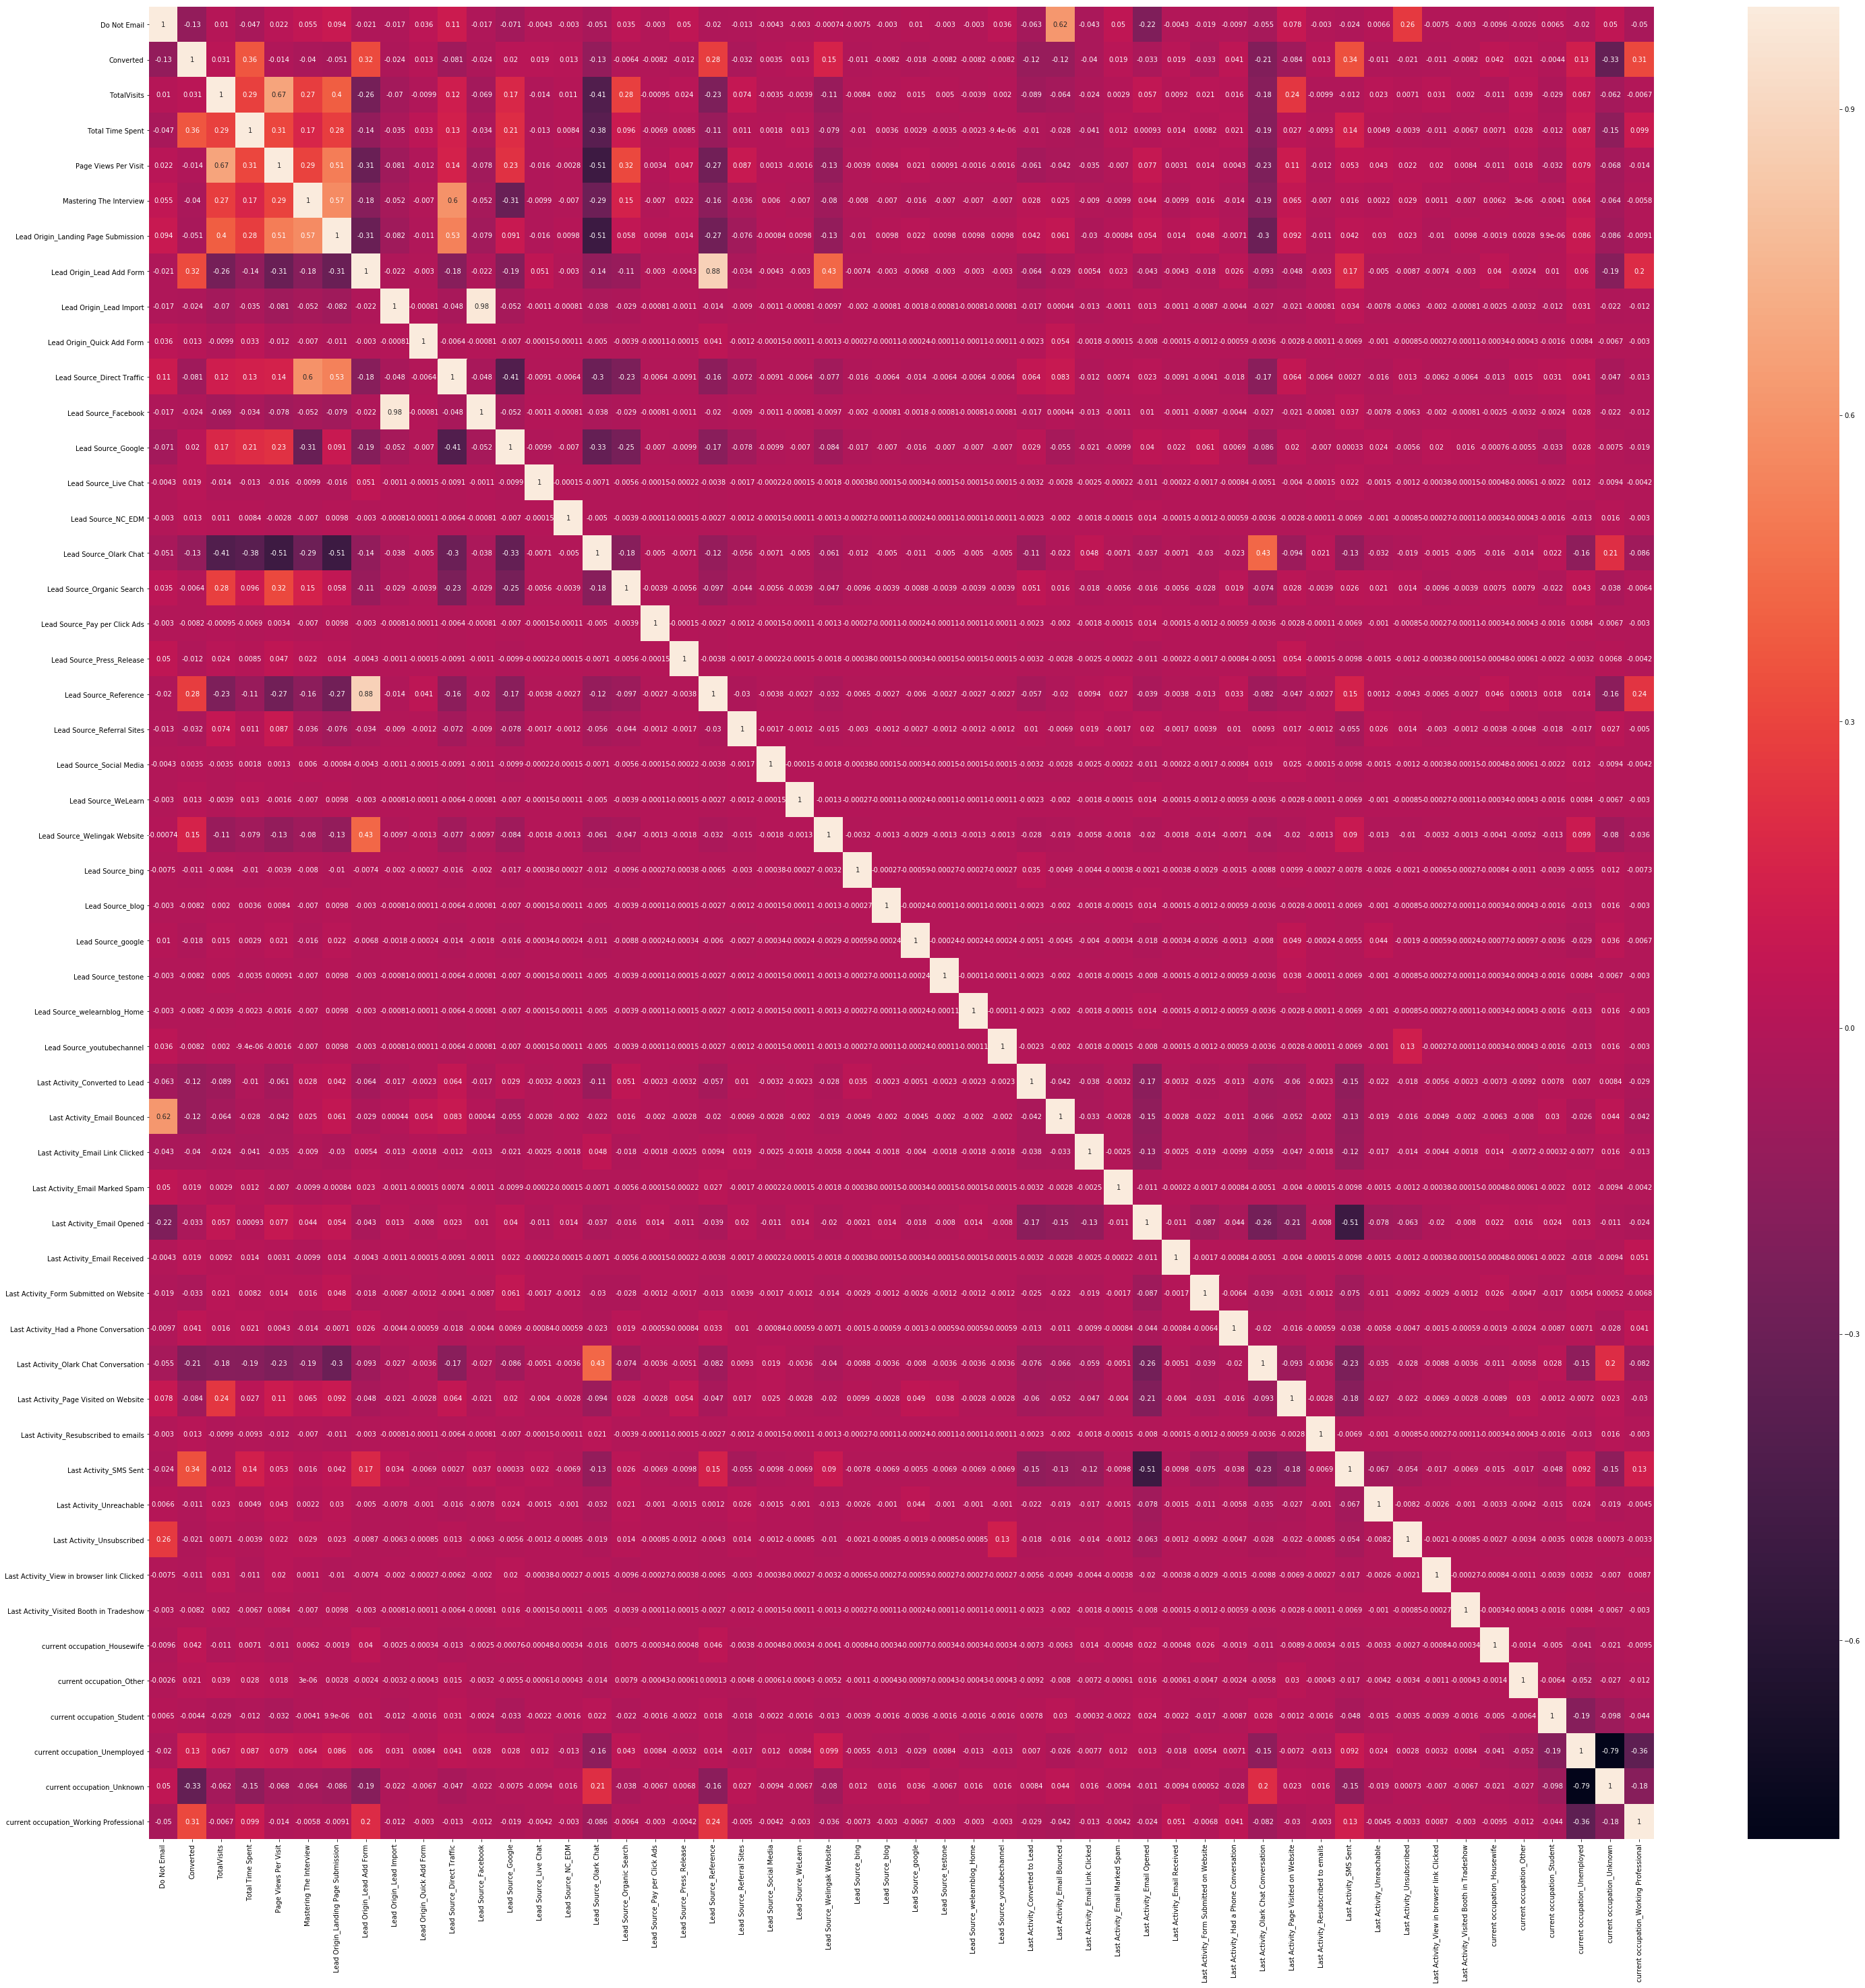

In [77]:
plt.figure(figsize = (50,50))     # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

## Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False,  True, False,  True, False, False,
        True, False, False, False,  True,  True])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Mastering The Interview', False, 30),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_blog', False, 27),
 ('Lead Source_goog

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
   

##### Assessing the model with StatsModels

In [84]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.2
Date:                Sun, 03 Mar 2019   Deviance:                       5318.4
Time:                        12:34:48   Pearson chi2:                 8.00e+03
No. Iterations:                    21   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0107      0.056    -18.105      0.000      -1.120      -0.901
Do Not Email                               -1.4110      0.201     -7.011      0.000      -1.805      -1.017
Total Time Spent                            1.0787      0.040     27.219      0.000       1.001       1.156
Lead Origin_Lead Add Form                   3.1977      0.189     16.933      0.000       2.828       3.568
Lead Source_Facebook                       -0.9141      0.530     -1.725      0.085      -1.953       0.125
Lead Source_Olark Chat                      1.2259      0.104     11.812      0.000       1.022       1.429
Lead Source_Welingak Website                2.8480      1.032      2.760      0.006       0.825       4.871
Last Activity_Converted to Lead            -1.1850      0.212     -5.594      0.000      -1.600      -0.770
Last Activity_Email Bounced                -0.8570      0.368     -2.331      0.020      -1.577      -0.137
Last Activity_Had a Phone Conversation      1.2913      0.699      1.847      0.065      -0.079       2.661
Last Activity_Olark Chat Conversation      -1.3128      0.162     -8.083      0.000      -1.631      -0.994
Last Activity_SMS Sent                      1.1257      0.075     15.029      0.000       0.979       1.272
Last Activity_Unsubscribed                  0.9497      0.493      1.928      0.054      -0.016       1.915
current occupation_Housewife               21.5974   1.65e+04      0.001      0.999   -3.23e+04    3.24e+04
current occupation_Unknown                 -1.2315      0.087    -14.136      0.000      -1.402      -1.061
current occupation_Working Professional     2.4208      0.181     13.401      0.000       2.067       2.775
===========================================================================================================
"""

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,2.05
7,Last Activity_Email Bounced,1.87
4,Lead Source_Olark Chat,1.64
2,Lead Origin_Lead Add Form,1.49
9,Last Activity_Olark Chat Conversation,1.40
10,Last Activity_SMS Sent,1.33
13,current occupation_Unknown,1.32
5,Lead Source_Welingak Website,1.27
1,Total Time Spent,1.24
14,current occupation_Working Professional,1.16


In [87]:
from sklearn import metrics

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1032    0.866657
6535    0.251631
6238    0.773513
3190    0.909824
712     0.054336
3942    0.646498
6808    0.121842
9206    0.865053
4683    0.349114
4333    0.435107
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86665663, 0.25163074, 0.77351278, 0.9098237 , 0.05433598,
       0.64649827, 0.12184218, 0.86505326, 0.3491136 , 0.43510655])

In [90]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,1,0.866657
1,0,0.251631
2,1,0.773513
3,1,0.909824
4,0,0.054336


In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,1,0.866657,1
1,0,0.251631,0
2,1,0.773513,1
3,1,0.909824,1
4,0,0.054336,0


In [92]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3521  450]
 [ 729 1763]]


In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175769766362371


In [94]:
# Drop the column "current occupation_Housewife" because of its high p-value 
X_train_sm = X_train_sm.drop(["current occupation_Housewife"], axis = 1)

In [95]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.6
Date:                Sun, 03 Mar 2019   Deviance:                       5323.1
Time:                        12:34:48   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0073      0.056    -18.061      0.000      -1.117      -0.898
Do Not Email                               -1.4136      0.201     -7.019      0.000      -1.808      -1.019
Total Time Spent                            1.0799      0.040     27.256      0.000       1.002       1.158
Lead Origin_Lead Add Form                   3.2183      0.189     17.068      0.000       2.849       3.588
Lead Source_Facebook                       -0.9141      0.530     -1.725      0.085      -1.953       0.125
Lead Source_Olark Chat                      1.2257      0.104     11.811      0.000       1.022       1.429
Lead Source_Welingak Website                2.8276      1.032      2.740      0.006       0.805       4.850
Last Activity_Converted to Lead            -1.1886      0.212     -5.611      0.000      -1.604      -0.773
Last Activity_Email Bounced                -0.8602      0.368     -2.338      0.019      -1.581      -0.139
Last Activity_Had a Phone Conversation      1.2871      0.700      1.840      0.066      -0.084       2.658
Last Activity_Olark Chat Conversation      -1.3153      0.162     -8.098      0.000      -1.634      -0.997
Last Activity_SMS Sent                      1.1222      0.075     14.985      0.000       0.975       1.269
Last Activity_Unsubscribed                  0.9478      0.493      1.923      0.054      -0.018       1.914
current occupation_Unknown                 -1.2334      0.087    -14.159      0.000      -1.404      -1.063
current occupation_Working Professional     2.4179      0.181     13.382      0.000       2.064       2.772
===========================================================================================================
"""

In [96]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.86687932, 0.25225637, 0.77750226, 0.91002246, 0.05428963,
       0.6466117 , 0.12186019, 0.8652764 , 0.34891164, 0.43486107])

In [97]:
y_train_pred_final['Converted_Prob'] = y_train_pred 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8172675228222188


So overall the accuracy hasn't dropped much.

In [99]:
# Drop the column "Lead Source_Facebook" because of its high p-value 
X_train_sm = X_train_sm.drop(["Lead Source_Facebook"], axis = 1)

In [100]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.3
Date:                Sun, 03 Mar 2019   Deviance:                       5326.5
Time:                        12:34:49   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0126      0.056    -18.172      0.000      -1.122      -0.903
Do Not Email                               -1.4062      0.201     -6.979      0.000      -1.801      -1.011
Total Time Spent                            1.0839      0.040     27.381      0.000       1.006       1.161
Lead Origin_Lead Add Form                   3.2286      0.188     17.133      0.000       2.859       3.598
Lead Source_Olark Chat                      1.2361      0.104     11.926      0.000       1.033       1.439
Lead Source_Welingak Website                2.8281      1.032      2.741      0.006       0.805       4.851
Last Activity_Converted to Lead            -1.1855      0.212     -5.594      0.000      -1.601      -0.770
Last Activity_Email Bounced                -0.8661      0.368     -2.352      0.019      -1.588      -0.144
Last Activity_Had a Phone Conversation      1.2904      0.700      1.843      0.065      -0.082       2.663
Last Activity_Olark Chat Conversation      -1.3162      0.162     -8.101      0.000      -1.635      -0.998
Last Activity_SMS Sent                      1.1148      0.075     14.918      0.000       0.968       1.261
Last Activity_Unsubscribed                  0.9432      0.493      1.913      0.056      -0.023       1.910
current occupation_Unknown                 -1.2325      0.087    -14.147      0.000      -1.403      -1.062
current occupation_Working Professional     2.4160      0.180     13.399      0.000       2.063       2.769
===========================================================================================================
"""

In [101]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.86615028, 0.25120341, 0.7777637 , 0.90963744, 0.0540511 ,
       0.64410675, 0.12213414, 0.86453403, 0.34541342, 0.43273211])

In [102]:
y_train_pred_final['Converted_Prob'] = y_train_pred 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171127959152097


So overall the accuracy hasn't dropped much.

In [104]:
# Drop the column "Last Activity_Had a Phone Conversation" because of its high p-value 
X_train_sm = X_train_sm.drop(["Last Activity_Had a Phone Conversation"], axis = 1)

In [105]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.1
Date:                Sun, 03 Mar 2019   Deviance:                       5330.1
Time:                        12:34:49   Pearson chi2:                 7.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0064      0.056    -18.105      0.000      -1.115      -0.897
Do Not Email                               -1.4047      0.202     -6.965      0.000      -1.800      -1.009
Total Time Spent                            1.0845      0.040     27.404      0.000       1.007       1.162
Lead Origin_Lead Add Form                   3.2338      0.188     17.173      0.000       2.865       3.603
Lead Source_Olark Chat                      1.2333      0.104     11.908      0.000       1.030       1.436
Lead Source_Welingak Website                2.8205      1.032      2.733      0.006       0.798       4.843
Last Activity_Converted to Lead            -1.1924      0.212     -5.626      0.000      -1.608      -0.777
Last Activity_Email Bounced                -0.8742      0.368     -2.373      0.018      -1.596      -0.152
Last Activity_Olark Chat Conversation      -1.3207      0.162     -8.129      0.000      -1.639      -1.002
Last Activity_SMS Sent                      1.1087      0.075     14.852      0.000       0.962       1.255
Last Activity_Unsubscribed                  0.9356      0.493      1.897      0.058      -0.031       1.902
current occupation_Unknown                 -1.2327      0.087    -14.154      0.000      -1.403      -1.062
current occupation_Working Professional     2.4198      0.180     13.432      0.000       2.067       2.773
===========================================================================================================
"""

In [106]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.86626977, 0.25236069, 0.77963512, 0.90974148, 0.05399854,
       0.64418758, 0.12241934, 0.86465388, 0.34534475, 0.4328142 ])

In [107]:
y_train_pred_final['Converted_Prob'] = y_train_pred 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8171127959152097


So overall the accuracy hasn't dropped much.

In [109]:
# Drop the column "Last Activity_Unsubscribed" because of its high p-value 
X_train_sm = X_train_sm.drop(["Last Activity_Unsubscribed"], axis = 1)

In [110]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.7
Date:                Sun, 03 Mar 2019   Deviance:                       5333.4
Time:                        12:34:49   Pearson chi2:                 7.51e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0008      0.055    -18.042      0.000      -1.110      -0.892
Do Not Email                               -1.2847      0.189     -6.812      0.000      -1.654      -0.915
Total Time Spent                            1.0851      0.040     27.427      0.000       1.008       1.163
Lead Origin_Lead Add Form                   3.2301      0.188     17.160      0.000       2.861       3.599
Lead Source_Olark Chat                      1.2336      0.104     11.915      0.000       1.031       1.437
Lead Source_Welingak Website                2.8083      1.032      2.722      0.006       0.786       4.831
Last Activity_Converted to Lead            -1.1982      0.212     -5.654      0.000      -1.613      -0.783
Last Activity_Email Bounced                -0.9851      0.362     -2.719      0.007      -1.695      -0.275
Last Activity_Olark Chat Conversation      -1.3271      0.162     -8.172      0.000      -1.645      -1.009
Last Activity_SMS Sent                      1.0959      0.074     14.758      0.000       0.950       1.241
current occupation_Unknown                 -1.2321      0.087    -14.152      0.000      -1.403      -1.061
current occupation_Working Professional     2.4160      0.180     13.424      0.000       2.063       2.769
===========================================================================================================
"""

In [111]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.86555258, 0.25340862, 0.77985808, 0.90925455, 0.05396861,
       0.64259763, 0.12306373, 0.86392841, 0.34361548, 0.43132019])

In [112]:
y_train_pred_final['Converted_Prob'] = y_train_pred 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [113]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8160297075661458


So overall the accuracy hasn't dropped much.

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.91
7,Last Activity_Email Bounced,1.72
1,Do Not Email,1.69
4,Lead Source_Olark Chat,1.43
3,Lead Origin_Lead Add Form,1.41
8,Last Activity_Olark Chat Conversation,1.30
2,Total Time Spent,1.27
5,Lead Source_Welingak Website,1.25
9,Last Activity_SMS Sent,1.18
10,current occupation_Unknown,1.13


In [115]:
# Drop the column "current occupation_Unknown" because this column is null value representation of "current occupation"
X_train_sm = X_train_sm.drop(["current occupation_Unknown"], axis = 1)

In [116]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_sm)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2778.2
Date:                Sun, 03 Mar 2019   Deviance:                       5556.5
Time:                        12:34:49   Pearson chi2:                 8.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3002      0.052    -24.891      0.000      -1.403      -1.198
Do Not Email                               -1.3088      0.187     -7.011      0.000      -1.675      -0.943
Total Time Spent                            1.0942      0.039     28.274      0.000       1.018       1.170
Lead Origin_Lead Add Form                   3.5179      0.188     18.697      0.000       3.149       3.887
Lead Source_Olark Chat                      1.1079      0.100     11.067      0.000       0.912       1.304
Lead Source_Welingak Website                2.8212      1.033      2.732      0.006       0.797       4.845
Last Activity_Converted to Lead            -1.1869      0.209     -5.678      0.000      -1.597      -0.777
Last Activity_Email Bounced                -0.9911      0.360     -2.750      0.006      -1.697      -0.285
Last Activity_Olark Chat Conversation      -1.4450      0.159     -9.094      0.000      -1.756      -1.134
Last Activity_SMS Sent                      1.1262      0.073     15.499      0.000       0.984       1.269
current occupation_Working Professional     2.7183      0.180     15.098      0.000       2.365       3.071
===========================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.41
7,Last Activity_Email Bounced,1.72
1,Do Not Email,1.69
4,Lead Source_Olark Chat,1.43
3,Lead Origin_Lead Add Form,1.39
8,Last Activity_Olark Chat Conversation,1.28
2,Total Time Spent,1.26
5,Lead Source_Welingak Website,1.24
9,Last Activity_SMS Sent,1.17
10,current occupation_Working Professional,1.08


In [118]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.83314118, 0.20091003, 0.77645199, 0.88636697, 0.04079069,
       0.5797535 , 0.23776814, 0.83118541, 0.28444422, 0.66682204])

In [119]:
y_train_pred_final['Converted_Prob'] = y_train_pred 
y_train_pred_final['Lead score'] = y_train_pred_final.Converted_Prob.map(lambda x: int(x*100))
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [120]:
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,Lead score
0,1,0.833141,1,83
1,0,0.200910,0,20
2,1,0.776452,1,77
3,1,0.886367,1,88
4,0,0.040791,0,4


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7980813863530868


Overall the accuracy has dropped a bit but this is because of null values of "current occupation" column which is not explainable we can convinently remove this column.

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3535  436]
 [ 869 1623]]


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6512841091492777

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.8902039788466382

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10979602115336187


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.7882467217095678


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8026793823796549


## Model Equation

Logistic Regression Equation:

$ log (odds) = -1.3002 -1.3088  \times  "Do Not Email" 
        + 1.0942  \times  "Total Time Spent" + 3.5179 \times "Lead Origin_Lead Add Form" 
        + 1.1079 \times "Lead Source_Olark Chat" + 2.8212 \times "Lead Source_Welingak Website" 
        - 1.1869 \times "Last Activity_Converted to Lead" -0.9911 \times "Last Activity_Email Bounced" 
        - 1.4450 \times "Last Activity_Olark Chat Conversation" + 1.1262 \times "Last Activity_SMS Sent" 
        + 2.7183 \times "current occupation_Working Professional" $

##  Plotting the ROC Curve

An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

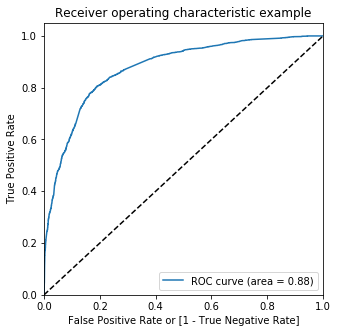

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [132]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,Lead score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.833141,1,83,1,1,1,1,1,1,1,1,1,0
1,0,0.200910,0,20,1,1,1,0,0,0,0,0,0,0
2,1,0.776452,1,77,1,1,1,1,1,1,1,1,0,0
3,1,0.886367,1,88,1,1,1,1,1,1,1,1,1,0
4,0,0.040791,0,4,1,0,0,0,0,0,0,0,0,0


In [133]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385579  1.000000  0.000000
0.1   0.1  0.569704  0.975923  0.314782
0.2   0.2  0.724586  0.918539  0.602871
0.3   0.3  0.794523  0.835072  0.769076
0.4   0.4  0.813399  0.773676  0.838328
0.5   0.5  0.798081  0.651284  0.890204
0.6   0.6  0.788334  0.582665  0.917401
0.7   0.7  0.771159  0.499197  0.941828
0.8   0.8  0.738047  0.367978  0.970285
0.9   0.9  0.704626  0.254013  0.987409


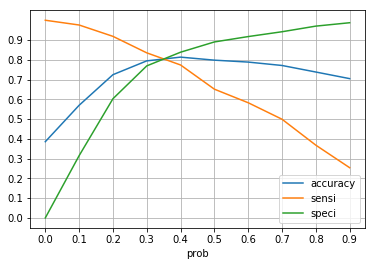

In [134]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(True, which='major')
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,Lead score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.833141,1,83,1,1,1,1,1,1,1,1,1,0,1
1,0,0.200910,0,20,1,1,1,0,0,0,0,0,0,0,0
2,1,0.776452,1,77,1,1,1,1,1,1,1,1,0,0,1
3,1,0.886367,1,88,1,1,1,1,1,1,1,1,1,0,1
4,0,0.040791,0,4,1,0,0,0,0,0,0,0,0,0,0


In [136]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8078291814946619

In [137]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3211,  760],
       [ 482, 2010]], dtype=int64)

In [138]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8065810593900482

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8086124401913876

In [141]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19138755980861244


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7256317689530686


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8694828053073382


## Making predictions on the test set

In [144]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['TotalVisits','Total Time Spent','Page Views Per Visit']
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

C:\Users\rbat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,Do Not Email,TotalVisits,Total Time Spent,Page Views Per Visit,Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,current occupation_Housewife,current occupation_Other,current occupation_Student,current occupation_Unemployed,current occupation_Unknown,current occupation_Working Professional
4869,0,-0.373161,1.526190,-0.154462,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8687,0,0.488278,1.752882,1.283637,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3719,0,-0.373161,-0.625557,-0.154462,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3511,0,1.349716,0.966772,0.166713,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2508,0,0.488278,-0.684058,1.283637,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'current occupation_Working Professional'],
      dtype='object')

In [146]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by variables from X_test
X_test_new = X_test[['Do Not Email', 'Total Time Spent',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'current occupation_Working Professional']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new) 

In [147]:
# Getting the predicted values on the train set
y_test_pred = res.predict(X_test_new)
y_test_pred[:10]

4869    0.956399
8687    0.851205
3719    0.297651
3511    0.439706
2508    0.284444
7812    0.305236
435     0.153074
7654    0.277975
4065    0.853683
2306    0.098606
dtype: float64

In [148]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.95639902, 0.85120533, 0.29765121, 0.43970568, 0.28444422,
       0.30523557, 0.15307403, 0.27797478, 0.8536828 , 0.09860637])

In [149]:
y_test_pred_final = pd.DataFrame({'Converted': y_test, 'Converted_Prob': y_test_pred})

In [150]:
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final['Lead score'] = y_test_pred_final.Converted_Prob.map(lambda x: int(x*100))
# Let's see the head
y_test_pred_final.head()

,Converted,Converted_Prob,predicted,Lead score
4869,1,0.956399,1,95
8687,1,0.851205,1,85
3719,0,0.297651,0,29
3511,1,0.439706,1,43
2508,1,0.284444,0,28


In [151]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
print(confusion_test)

[[1407  296]
 [ 216  851]]


In [152]:
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)) # Calculate false postive rate

0.8151624548736462


In [153]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [154]:
TP / float(TP+FN) # Let's see the sensitivity of our logistic regression model

0.7975632614807873

In [155]:
TN / float(TN+FP) # Let us calculate specificity

0.826189078097475

In [156]:
print(FP/ float(TN+FP)) # Calculate false postive rate

0.17381092190252495


In [157]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_pred_final.Converted, y_test_pred_final.predicted)

0.7419354838709677

In [158]:
# positive predictive value 
print (TP / float(TP+FP))

0.7419354838709677


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.866913123844732


Test set Statistics:
    Accuracy : 81.51%
    Sensitivity : 79.75%
    Specificity : 82.61%